### <span style="font-family:Papyrus; font-size:2em;color:navy">☺ E-Commerce – EDA – Python Project 2</span>

### Importing required packages ...

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os 
import datetime as dt
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.getcwd()  # getting current working directory

'C:\\Users\\Nikhil Waghalkar'

In [3]:
os.chdir(r"C:\Users\Nikhil Waghalkar\Desktop\Python Assingnment\Python Assignment 5_BI") # changing cwd...

In [4]:
# setting display option for dataframe
pd.set_option("display.max_rows",100)
pd.set_option("display.max_columns",50)

In [5]:
df=pd.read_csv("Ecommerce - UK Retailer.csv",encoding="ISO-8859-1")  #imporing data...

In [6]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [7]:
# change coloumn name for easiness...
df.rename(index=str, columns={"InvoiceNo": "invoice_num",
                              "StockCode" : "stock_code",
                              "Description" : "description",
                              "Quantity" : "quantity",
                              "InvoiceDate" : "invoice_date",
                              "UnitPrice" : "unit_price",
                              "CustomerID" : "customer_id",
                              "Country" : "country"}, inplace=True)

In [8]:
df.shape

(541909, 8)

In [9]:
df.dtypes

invoice_num      object
stock_code       object
description      object
quantity          int64
invoice_date     object
unit_price      float64
customer_id     float64
country          object
dtype: object

In [10]:
# changing datatype of invoice date
df.invoice_date=df.invoice_date.astype("datetime64")

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 37.2+ MB


In [12]:
df.isnull().sum()

invoice_num          0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
country              0
dtype: int64

In [13]:
df.describe(include="all")

,invoice_num,stock_code,description,quantity,invoice_date,unit_price,customer_id,country
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4223,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,2011-10-31 14:41:00,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
first,NaN,NaN,NaN,NaN,2010-12-01 08:26:00,NaN,NaN,NaN
last,NaN,NaN,NaN,NaN,2011-12-09 12:50:00,NaN,NaN,NaN
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN


### 2. Check for missing values in all columns and replace them with the appropriate metric

In [14]:
# As i checked data sepreatly there are 24.92 % Customer ids are missing and o.92 % of Descriptions
# are missing which is fine we can imput mode instead of that but customer id is huge in amount we can 
# drop that column for better result but project says that you have to imput appropiate matric and 
# another observation comes into picture that where 0.92 % of descriptions are missing at the same 
# place customer ids are also missing so another approch is to drop records where there is null present
# but i use mode in descriptions and mean in customer id because there is not too much spread...

In [15]:
# Replacing nulls in description with mode and in customer_id with mean
df.loc[df.description.isnull(),"description"]="WHITE HANGING HEART T-LIGHT HOLDER"
df.loc[df.customer_id.isnull(),"customer_id"]=df.customer_id.mean()
# changing datatype of customer id
df.customer_id=df.customer_id.astype("int64")

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_num   541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   541909 non-null  object        
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   541909 non-null  int64         
 7   country       541909 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 37.2+ MB


### 3. Remove duplicate rows

In [17]:
df.drop_duplicates(inplace=True,ignore_index=True)

### 4. Remove rows which have negative values in Quantity column

In [18]:
neg_quantity_rows=df.loc[df.quantity<0].index
df.drop(index=neg_quantity_rows,inplace=True)
df.reset_index(drop=True,inplace=True)

### 5. Add the columns - Month, Day and Hour for the invoice

In [19]:
df.insert(loc=5,column="year_month",value=df.invoice_date.map(lambda x: 100*x.year + x.month))
df.insert(loc=6,column="month",value=pd.DatetimeIndex(df.invoice_date).month)
df.insert(loc=7,column="day",value=pd.DatetimeIndex(df.invoice_date).dayofweek+1)
df.insert(loc=8,column="hour",value=pd.DatetimeIndex(df.invoice_date).hour)
df.insert(loc=9,column="money_spent",value=df.quantity*df.unit_price)

In [20]:
df.head(3)

,invoice_num,stock_code,description,quantity,invoice_date,year_month,month,day,hour,money_spent,unit_price,customer_id,country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,201012,12,3,8,15.30,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,201012,12,3,8,20.34,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,201012,12,3,8,22.00,2.75,17850,United Kingdom


### 6. How many orders made by the customers?

In [21]:
order_by_Cust=df.groupby(by=["customer_id","country"],as_index= False)["invoice_num"].count()
order_by_Cust

,customer_id,country,invoice_num
0,12346,United Kingdom,1
1,12347,Iceland,182
2,12348,Finland,31
3,12349,Italy,73
4,12350,Norway,17
...,...,...,...
4350,18280,United Kingdom,10
4351,18281,United Kingdom,7
4352,18282,United Kingdom,12
4353,18283,United Kingdom,721


### 7. TOP 5 customers with higher number of orders

In [22]:
Top_5_orders=order_by_Cust.sort_values(by="invoice_num",ascending=False).head()
Top_5_orders

,customer_id,country,invoice_num
2175,15287,United Kingdom,131936
4027,17841,United Kingdom,7676
1888,14911,EIRE,5672
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4413


### 8. How much money spent by the customers?

In [23]:
money_spent_by_cust=df.groupby(by=["customer_id","country"],as_index= False)["money_spent"].sum()
money_spent_by_cust

,customer_id,country,money_spent
0,12346,United Kingdom,77183.60
1,12347,Iceland,4310.00
2,12348,Finland,1797.24
3,12349,Italy,1757.55
4,12350,Norway,334.40
...,...,...,...
4350,18280,United Kingdom,180.60
4351,18281,United Kingdom,80.82
4352,18282,United Kingdom,178.05
4353,18283,United Kingdom,2045.53


### 9. TOP 5 customers with highest money spent

In [24]:
Top_5_money_spent=money_spent_by_cust.sort_values(by="money_spent",ascending=False).round(2)
Top_5_money_spent

,customer_id,country,money_spent
2175,15287,United Kingdom,1695082.02
1698,14646,Netherlands,280206.02
4218,18102,United Kingdom,259657.30
3745,17450,United Kingdom,194390.79
3025,16446,United Kingdom,168472.50
...,...,...,...
4115,17956,United Kingdom,12.75
3031,16454,United Kingdom,6.90
1802,14792,United Kingdom,6.20
3234,16738,United Kingdom,3.75


### 10. How many orders per month?

In [25]:
df.groupby(by=["year_month"],as_index=False)["invoice_num"].nunique()

,year_month,invoice_num
0,201012,1629
1,201101,1120
2,201102,1126
3,201103,1531
4,201104,1318
5,201105,1731
6,201106,1576
7,201107,1540
8,201108,1409
9,201109,1896


### 11. How many orders per day?

In [26]:
df.groupby(by=["day"],as_index=False)["invoice_num"].nunique()

,day,invoice_num
0,1,3237
1,2,3717
2,3,3865
3,4,4408
4,5,3294
5,7,2207


### 12. How many orders per hour?

In [27]:
df.groupby(by=["hour"],as_index=False)["invoice_num"].nunique()

,hour,invoice_num
0,6,1
1,7,29
2,8,568
3,9,1538
4,10,2431
5,11,2473
6,12,3323
7,13,2818
8,14,2557
9,15,2474


### 13. How many orders for each country?

In [28]:
df.groupby(by=["country"],as_index=False)["invoice_num"].nunique()

,country,invoice_num
0,Australia,57
1,Austria,17
2,Bahrain,3
3,Belgium,98
4,Brazil,1
5,Canada,6
6,Channel Islands,26
7,Cyprus,16
8,Czech Republic,2
9,Denmark,18


### 15. How much money spent by each country?

In [29]:
df.groupby(by=["country"],as_index=False)["money_spent"].sum().round()

,country,money_spent
0,Australia,138454.0
1,Austria,10199.0
2,Bahrain,754.0
3,Belgium,41196.0
4,Brazil,1144.0
5,Canada,3666.0
6,Channel Islands,20441.0
7,Cyprus,13503.0
8,Czech Republic,827.0
9,Denmark,18955.0


### 1. Perform Basic EDA

### a. Boxplot – All Numeric Variables

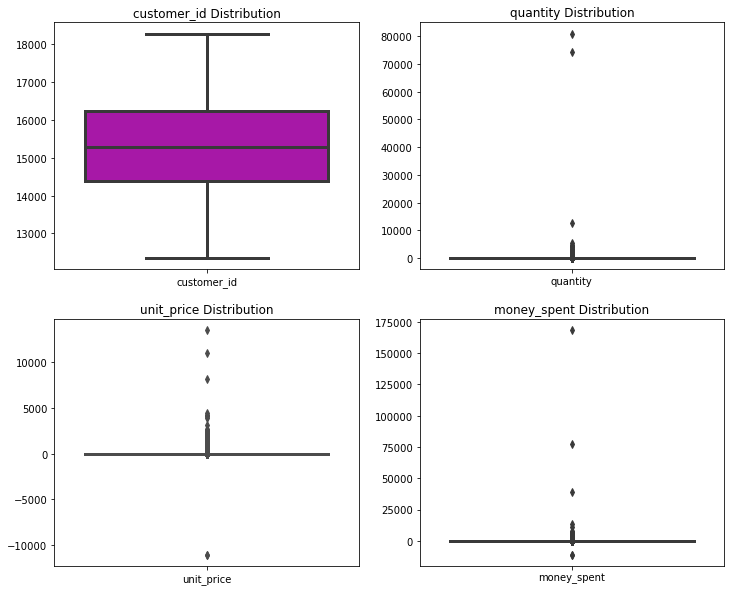

In [30]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1,title="customer_id Distribution")
sns.boxplot(data=df[["customer_id"]],linewidth=3,color="m")
plt.subplot(2,2,2,title="quantity Distribution")
sns.boxplot(data=df[["quantity"]],linewidth=3,color="y")
plt.subplot(2,2,3,title="unit_price Distribution")
sns.boxplot(data=df[["unit_price"]],linewidth=3,color="r")
plt.subplot(2,2,4,title="money_spent Distribution")
sns.boxplot(data=df[["money_spent"]],linewidth=3,color="c")
plt.show()

### b. Histogram – All Numeric Variables

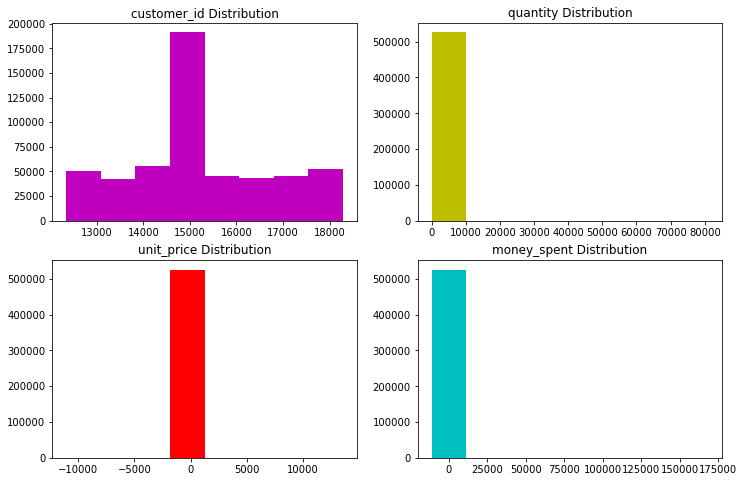

In [31]:
plt.figure(figsize=(12,8))
plt.subplot(2,2,1,title="customer_id Distribution")
plt.hist("customer_id",data=df,linewidth=5,color="m",bins=8)
plt.subplot(2,2,2,title="quantity Distribution")
plt.hist("quantity",data=df,linewidth=3,color="y",bins=8)
plt.subplot(2,2,3,title="unit_price Distribution")
plt.hist("unit_price",data=df,linewidth=3,color="r",bins=8)
plt.subplot(2,2,4,title="money_spent Distribution")
plt.hist("money_spent",data=df,linewidth=3,color="c",bins=8)
plt.show()

### c. Distribution Plot – All Numeric Variables

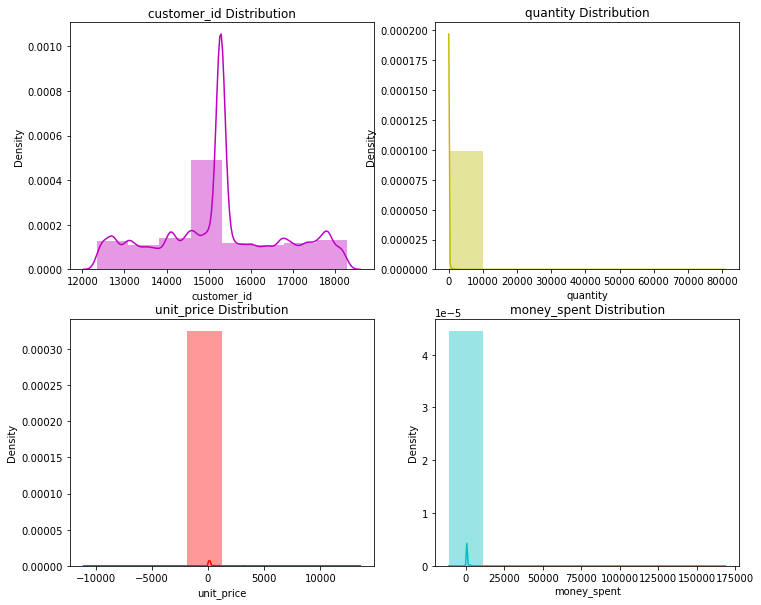

In [32]:
plt.figure(figsize=(12,10))
plt.subplot(2,2,1,title="customer_id Distribution")
sns.distplot(a=df["customer_id"],color="m",bins=8)
plt.subplot(2,2,2,title="quantity Distribution")
sns.distplot(a=df["quantity"],color="y",bins=8)
plt.subplot(2,2,3,title="unit_price Distribution")
sns.distplot(a=df["unit_price"],color="r",bins=8)
plt.subplot(2,2,4,title="money_spent Distribution")
sns.distplot(a=df["money_spent"],color="c",bins=8)
plt.show()

### d. Aggregation for all numerical Columns

In [33]:
agg=df[["unit_price","quantity","money_spent","customer_id"]].agg(["sum","min","max","mean","median","count"])
aggrigtion=agg.round(2)
aggrigtion

,unit_price,quantity,money_spent,customer_id
sum,2036747.92,5645019.00,10619986.68,8.042076e+09
min,-11062.06,1.00,-11062.06,1.234600e+04
max,13541.33,80995.00,168469.60,1.828700e+04
mean,3.87,10.73,20.19,1.528755e+04
median,2.08,4.00,9.92,1.528700e+04
count,526054.00,526054.00,526054.00,5.260540e+05


### e. Unique Values across all columns

In [34]:
df.nunique()

invoice_num     20728
stock_code       3941
description      4077
quantity          393
invoice_date    19052
year_month         13
month              12
day                 6
hour               15
money_spent      4908
unit_price       1293
customer_id      4339
country            38
dtype: int64

### f. Duplicate values across all columns

In [35]:
len(df.index)-df.nunique()

invoice_num     505326
stock_code      522113
description     521977
quantity        525661
invoice_date    507002
year_month      526041
month           526042
day             526048
hour            526039
money_spent     521146
unit_price      524761
customer_id     521715
country         526016
dtype: int64

### g. Correlation – Heatmap - All Numeric Variables

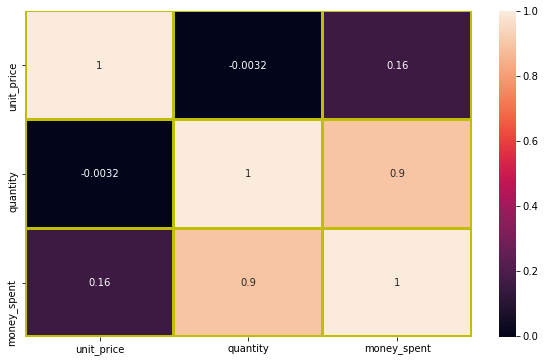

In [36]:
plt.figure(figsize=(10,6))
sns.heatmap(data=df[["unit_price","quantity","money_spent"]].corr(), annot = True ,linewidths=2,linecolor='y')
plt.show()

### h. Regression Plot - All Numeric Variables

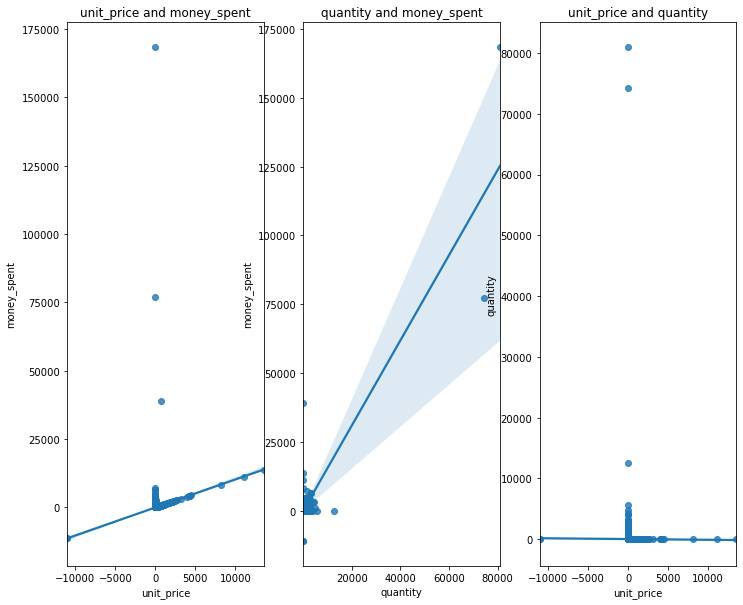

In [37]:
plt.figure(figsize=(12,10))
plt.subplot(1,3,1,title="unit_price and money_spent")
sns.regplot(x="unit_price",y="money_spent",data=df)
plt.subplot(1,3,2,title="quantity and money_spent")
sns.regplot(x="quantity",y="money_spent",data=df)
plt.subplot(1,3,3,title="unit_price and quantity")
sns.regplot(x="unit_price",y="quantity",data=df)
plt.show()

### i. Bar Plot – Every Categorical Variable vs every Numerical Variable

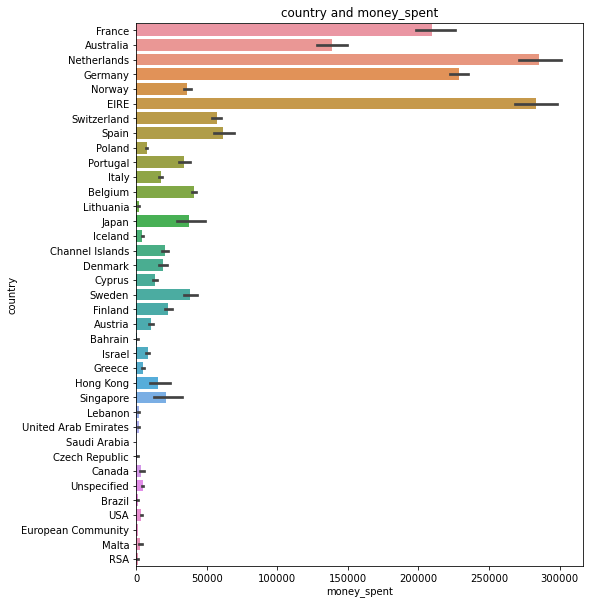

In [38]:
plt.figure(figsize=(8,10))
plt.title("country and money_spent")
sns.barplot(x="money_spent",y="country",data=df[df.country!="United Kingdom"],estimator=np.sum)
plt.show()

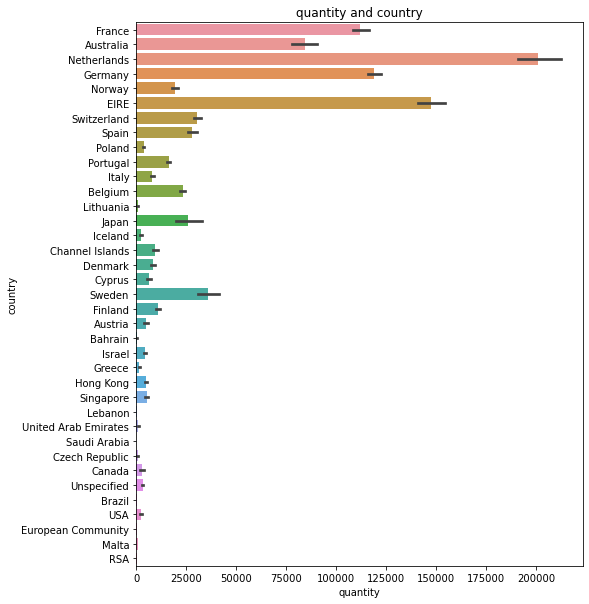

In [39]:
plt.figure(figsize=(8,10))
plt.title("quantity and country")
sns.barplot(y="country",x="quantity",data=df[df.country!="United Kingdom"],estimator=np.sum)
plt.show()

### j. Pair plot - All Numeric Variables

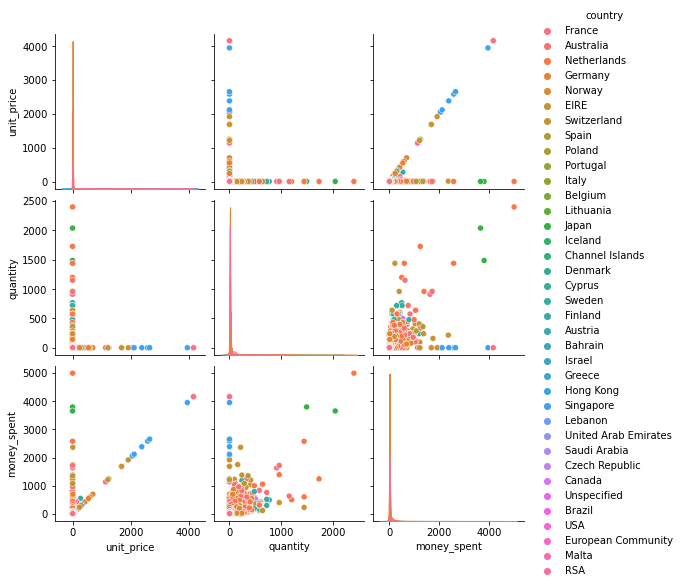

In [40]:
sns.pairplot(df[["unit_price","quantity","money_spent","country"]]
             [df[["unit_price","quantity","money_spent","country"]].country!="United Kingdom"],hue="country")
plt.show()

### k. Line chart to show the trend of data - All Numeric/Date Variables

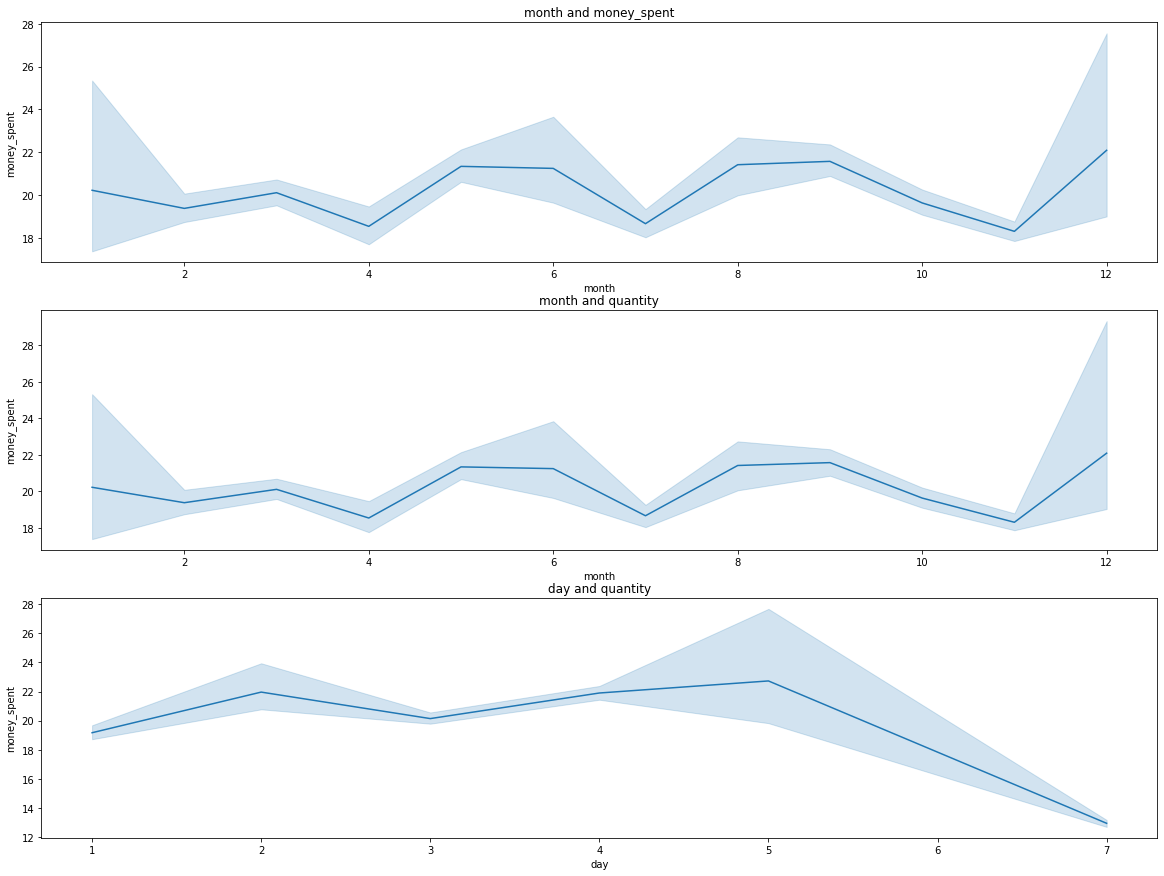

In [41]:
plt.figure(figsize=(20,15))
plt.subplot(3,1,1,title="month and money_spent")
sns.lineplot(x="month",y="money_spent",data=df)
plt.subplot(3,1,2,title="month and quantity")
sns.lineplot(x="month",y="money_spent",data=df)
plt.subplot(3,1,3,title="day and quantity")
sns.lineplot(x="day",y="money_spent",data=df)
plt.show()

### l. Plot the skewness - All Numeric Variables

In [42]:
df.skew(axis=0,skipna=True)

quantity       457.999413
year_month      -3.051230
month           -0.414169
day              0.468673
hour            -0.002370
money_spent    499.769713
unit_price      60.256683
customer_id      0.035324
dtype: float64

### <span style="font-family:Papyrus; font-size:2em;color:navy">☺ Thank you</span>